# 데이터 속성

## 은행 고객 데이터:
'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'
*1 - age = 

연령(숫자)

*2 - job 

직업의 종류(카테고리: "관리","블루칼라","기업가","하녀","관리","은퇴","자영업","서비스","학생 ","기술자","실업자","알 수 없음")

*3 - marital

혼인 여부(범주: "이혼", "기혼", "미혼", "모름", 참고: "이혼"은 이혼 또는 사별을 의미함)

*4 - education

(카테고리: "basic.4y","basic.6y","basic.9y","high.school","문맹","professional.course","university.degree","알 수 없음" )

5 - default

기본 신용이 있습니까? (범주: "아니오","예","알 수 없음")

6 - housing

주택 융자가 있습니까? (범주: "아니오","예","알 수 없음")

7 - loan

개인 대출이 있습니까? (범주: "아니오","예","알 수 없음")


## 기타 속성

*13 - pdays: 

이전 캠페인에서 클라이언트가 마지막으로 연락된 후 경과한 일 수(숫자, 999는 클라이언트가 이전에 연락되지 않았음을 의미함)

*14 - previous: 

이 캠페인 이전에 이 클라이언트에 대해 수행된 컨택 수(숫자)

*15 - poutcome: 

이전 마케팅 캠페인의 결과(범주: "실패","존재하지 않음","성공")



## 타겟값

21 - y - 고객이 정기 예금에 가입했습니까? (이진법: "예","아니요")

속성 값 누락: 일부 범주 속성에는 여러 개의 누락 값이 있으며 모두 "알 수 없음" 레이블로 코딩됩니다. 이러한 누락된 값은 가능한 클래스 레이블로 처리되거나 삭제 또는 대치 기술을 사용하여 처리될 수 있습니다.

## 사용 데이터
고객 데이터 + 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings(action='ignore')

In [62]:
df_raw = pd.read_csv('bank-additional-full.csv',sep=';')

list = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

df_raw.to_csv('raw_bank.csv')
df_raw

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [64]:
df_raw.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# 탐색적 데이터 분석

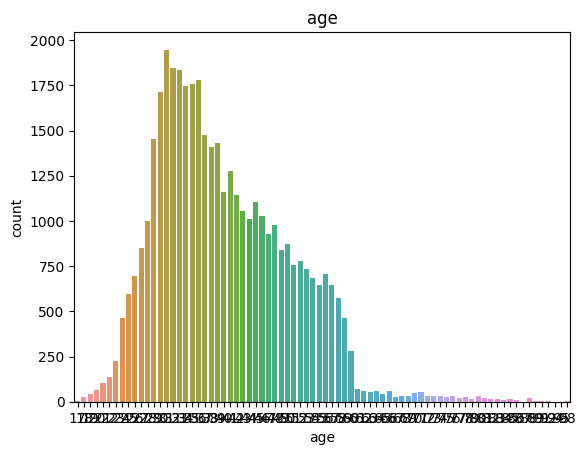

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

31    0.047271
32    0.044819
33    0.044503
36    0.043216
35    0.042707
        ...   
89    0.000049
91    0.000049
94    0.000024
87    0.000024
95    0.000024
Name: age, Length: 78, dtype: float64

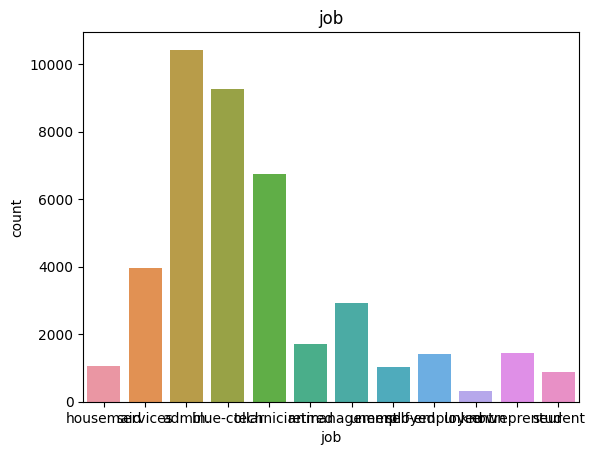

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

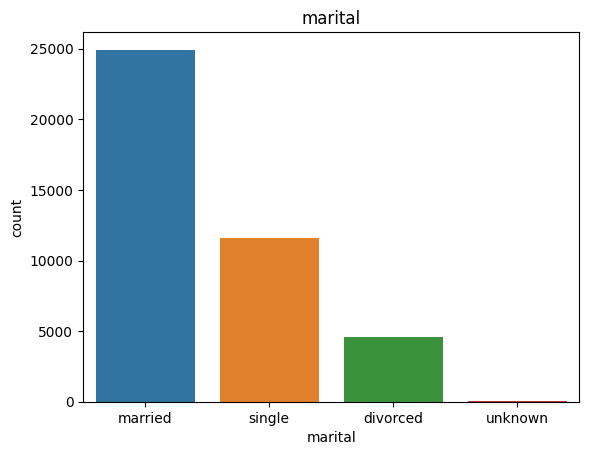

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

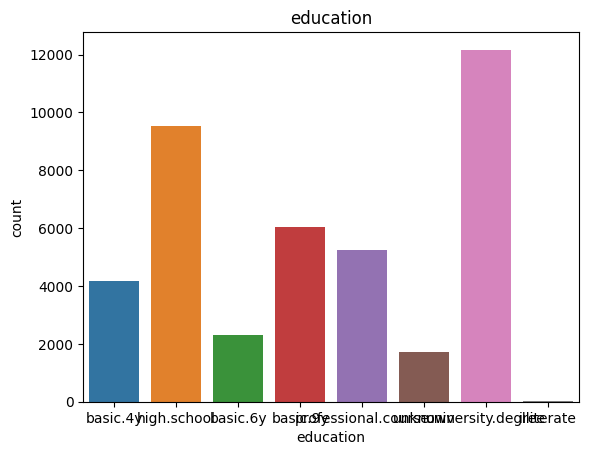

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

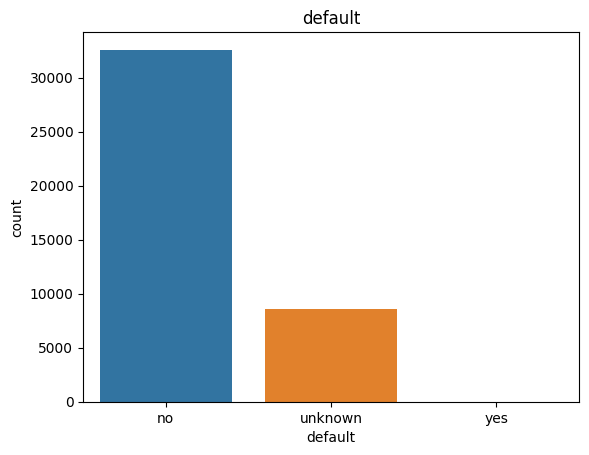

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64

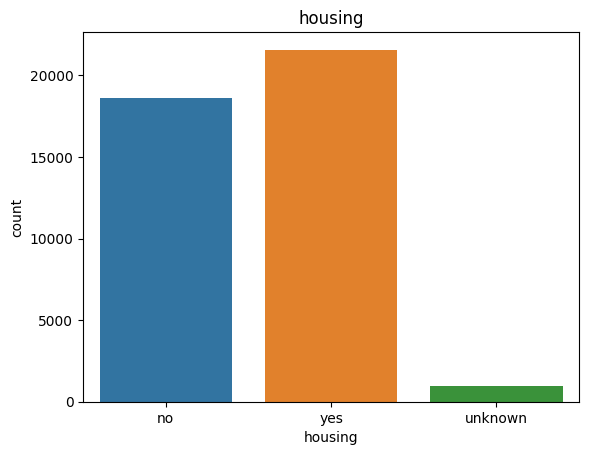

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64

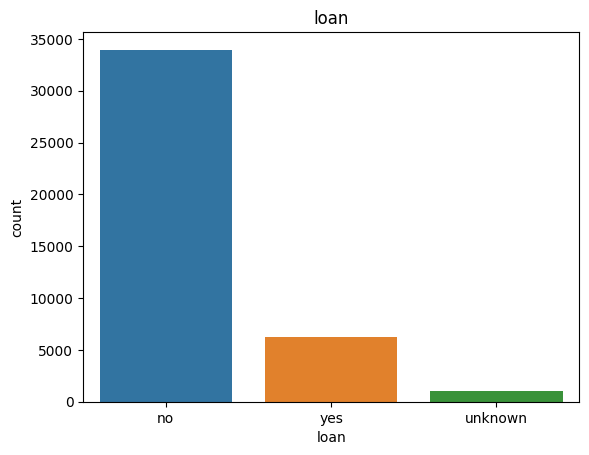

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: float64

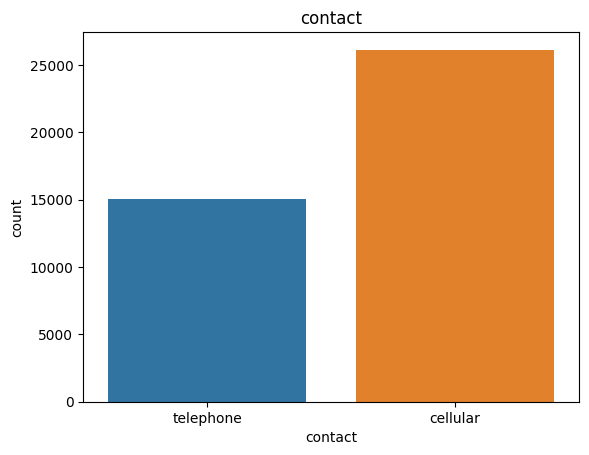

cellular     26144
telephone    15044
Name: contact, dtype: int64

cellular     0.634748
telephone    0.365252
Name: contact, dtype: float64

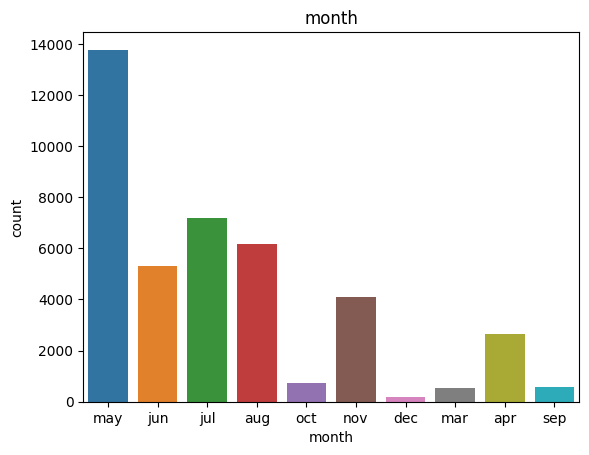

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

may    0.334296
jul    0.174177
aug    0.149995
jun    0.129115
nov    0.099568
apr    0.063902
oct    0.017432
sep    0.013839
mar    0.013256
dec    0.004419
Name: month, dtype: float64

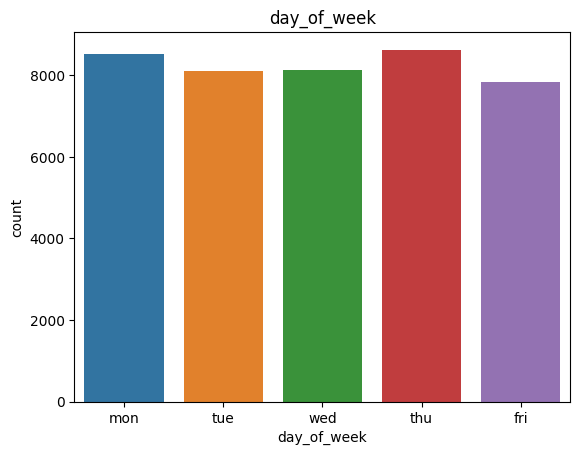

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

thu    0.209357
mon    0.206711
wed    0.197485
tue    0.196416
fri    0.190031
Name: day_of_week, dtype: float64

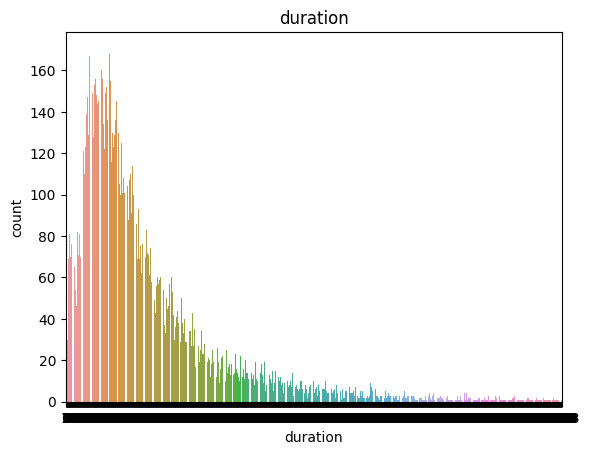

90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

90      0.004127
85      0.004127
136     0.004079
73      0.004055
124     0.003982
          ...   
1569    0.000024
1053    0.000024
1263    0.000024
1169    0.000024
1868    0.000024
Name: duration, Length: 1544, dtype: float64

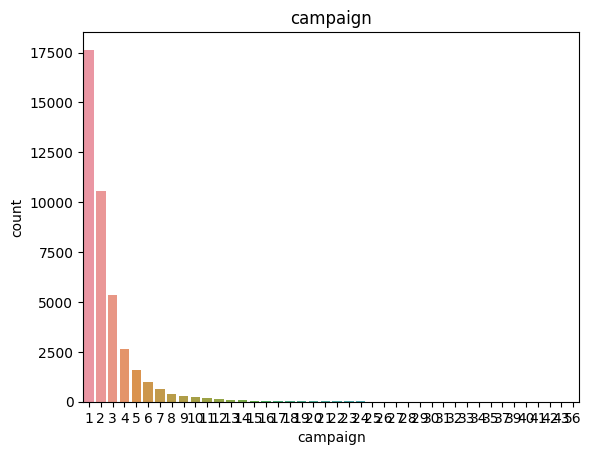

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

1     0.428329
2     0.256628
3     0.129674
4     0.064363
5     0.038822
6     0.023769
7     0.015271
8     0.009712
9     0.006871
10    0.005463
11    0.004297
12    0.003035
13    0.002234
14    0.001675
17    0.001408
16    0.001238
15    0.001238
18    0.000801
20    0.000728
19    0.000631
21    0.000583
22    0.000413
23    0.000388
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: campaign, dtype: float64

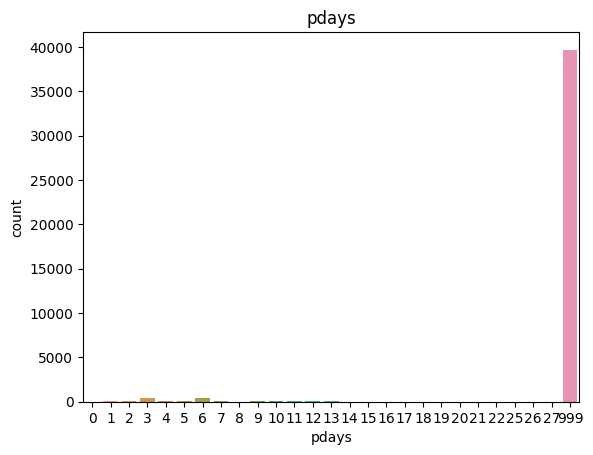

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

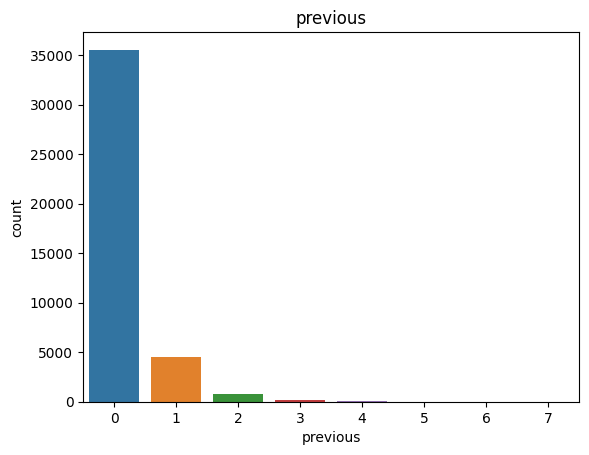

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

0    0.863431
1    0.110736
2    0.018306
3    0.005244
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: previous, dtype: float64

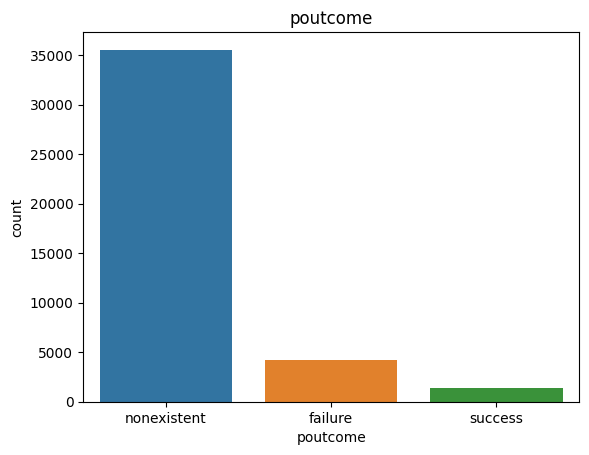

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

nonexistent    0.863431
failure        0.103234
success        0.033335
Name: poutcome, dtype: float64

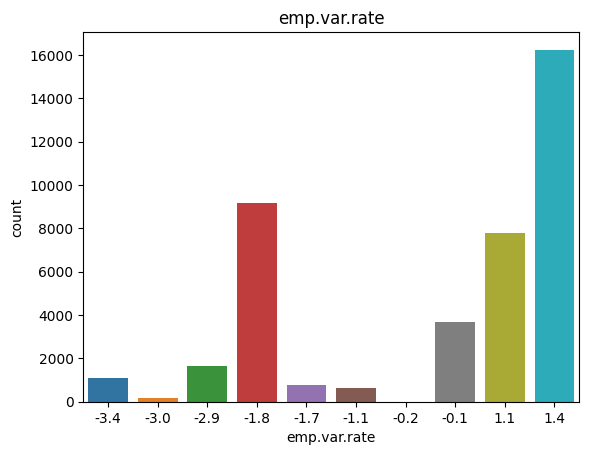

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

 1.4    0.394144
-1.8    0.222978
 1.1    0.188477
-0.1    0.089419
-2.9    0.040376
-3.4    0.026003
-1.7    0.018768
-1.1    0.015417
-3.0    0.004176
-0.2    0.000243
Name: emp.var.rate, dtype: float64

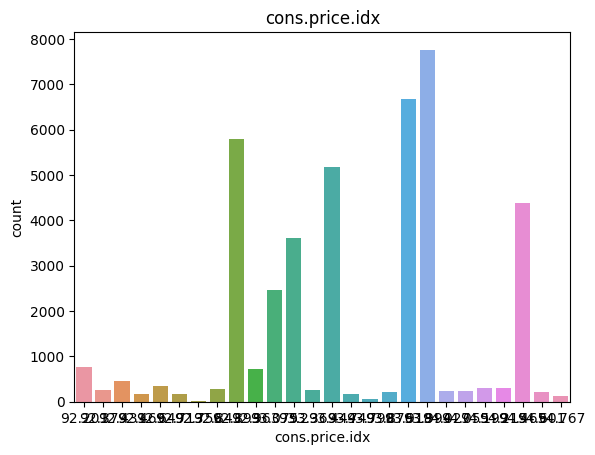

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

93.994    0.188477
93.918    0.162305
92.893    0.140672
93.444    0.125643
94.465    0.106196
93.200    0.087793
93.075    0.059678
92.201    0.018695
92.963    0.017359
92.431    0.010853
92.649    0.008668
94.215    0.007551
94.199    0.007357
92.843    0.006847
92.379    0.006482
93.369    0.006410
94.027    0.005657
94.055    0.005560
93.876    0.005147
94.601    0.004953
92.469    0.004322
93.749    0.004225
92.713    0.004176
94.767    0.003108
93.798    0.001627
92.756    0.000243
Name: cons.price.idx, dtype: float64

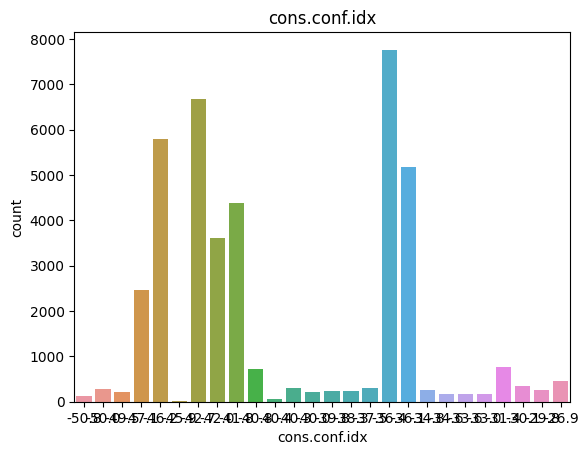

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

-36.4    0.188477
-42.7    0.162305
-46.2    0.140672
-36.1    0.125643
-41.8    0.106196
-42.0    0.087793
-47.1    0.059678
-31.4    0.018695
-40.8    0.017359
-26.9    0.010853
-30.1    0.008668
-40.3    0.007551
-37.5    0.007357
-50.0    0.006847
-29.8    0.006482
-34.8    0.006410
-38.3    0.005657
-39.8    0.005560
-40.0    0.005147
-49.5    0.004953
-33.6    0.004322
-34.6    0.004225
-33.0    0.004176
-50.8    0.003108
-40.4    0.001627
-45.9    0.000243
Name: cons.conf.idx, dtype: float64

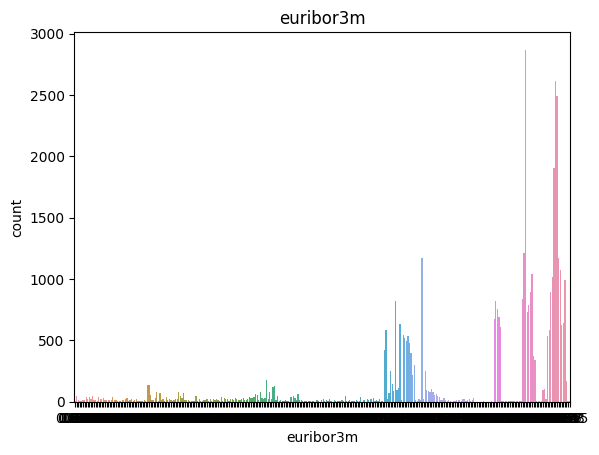

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

4.857    0.069632
4.962    0.063441
4.963    0.060382
4.961    0.046178
4.856    0.029377
           ...   
3.853    0.000024
3.901    0.000024
0.969    0.000024
0.956    0.000024
3.669    0.000024
Name: euribor3m, Length: 316, dtype: float64

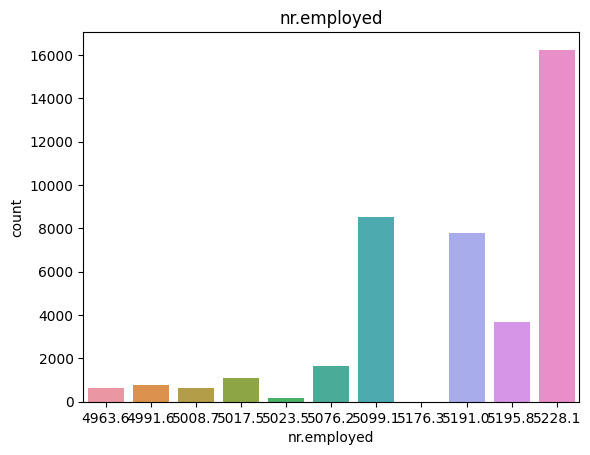

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

5228.1    0.394144
5099.1    0.207196
5191.0    0.188477
5195.8    0.089419
5076.2    0.040376
5017.5    0.026003
4991.6    0.018768
5008.7    0.015781
4963.6    0.015417
5023.5    0.004176
5176.3    0.000243
Name: nr.employed, dtype: float64

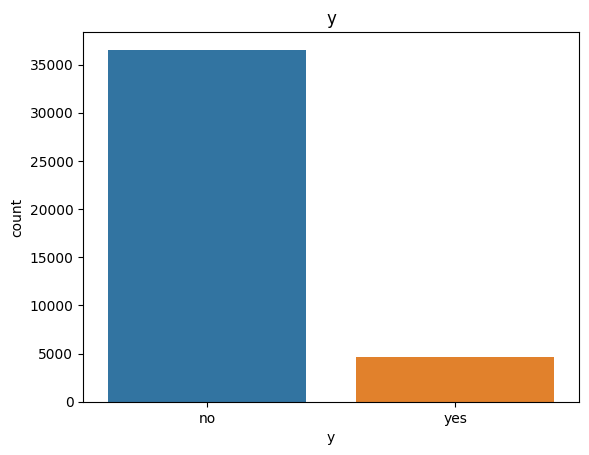

no     36548
yes     4640
Name: y, dtype: int64

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [27]:
df = df_raw
for i in list:
    sns.countplot(df[i])
    plt.title(i)
    plt.show()
    display(df[i].value_counts())
    display(df[i].value_counts()/len(df.index))


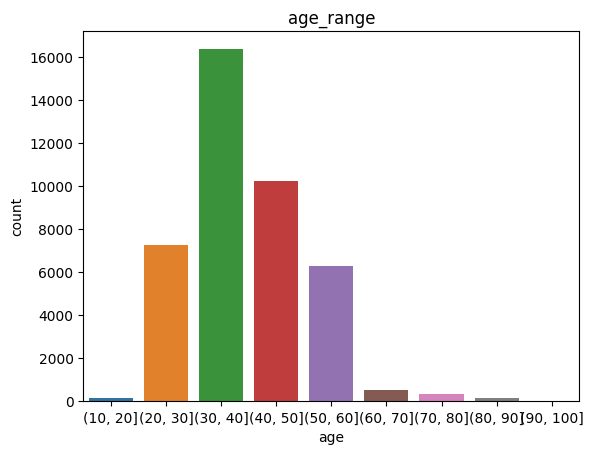

(30, 40]     16385
(40, 50]     10240
(20, 30]      7243
(50, 60]      6270
(60, 70]       488
(70, 80]       303
(10, 20]       140
(80, 90]       109
(90, 100]       10
Name: age, dtype: int64


In [28]:
list = pd.cut(df['age'],bins=[10,20,30,40,50,60,70,80,90,100])

sns.countplot(list)
plt.title('age_range')
plt.show()
print(list.value_counts())



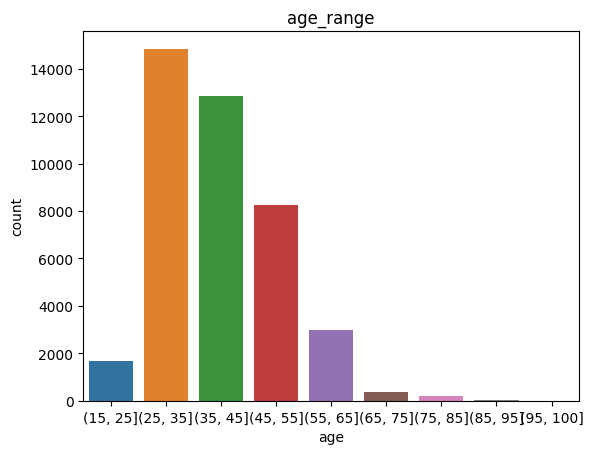

(25, 35]     14847
(35, 45]     12844
(45, 55]      8249
(55, 65]      2963
(15, 25]      1666
(65, 75]       374
(75, 85]       202
(85, 95]        41
(95, 100]        2
Name: age, dtype: int64


In [29]:
list = pd.cut(df['age'],bins=[15,25,35,45,55,65,75,85,95,100])

sns.countplot(list)
plt.title('age_range')
plt.show()
print(list.value_counts())

df_range = df_raw

In [30]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

# 탐색적 데이터 분석 결과
현행 은행 정기예금 마케팅에 관련하여
마케팅 주력 연령: 30대, 40대, 20대, 50대 순으로 나타남
-> 경제활동이 활발한 인구층 대상 마케팅 진행

마케팅 직군 구분: 관리직, 숙련노동자, 기술자, 서비스업종 순서로 나타난다.

마케팅 결혼 유무: 기혼자 대상 마케팅 비율 60% 이상

마케팅 교육 수준: 교육수준이 높을수록 마케팅 대상 비중이 높다.

파산 경험: 파산 경험이 없는 경우가 마케팅 대상 중 80%, 나머지 20%는 데이터가 없는 경우

주택담보 대출 유무: 마케팅 대상중 52%가 주담대 보유, 42%가 주담대 없음 나머지는 데이터 없음

개인 대출 유무: 마케팅 대상 중 82%가 개인대출 없고 15%가 있으며 나머지는 데이터가 없음

## 고객 데이터 기반 총평

* 일반적으로 경제활동을 활발히 하면서 고액 소득이 기대되는 사람들을 중심으로 마케팅을 진행한다.

---------------------------------------------------------------------------------------------------------

마케팅 방식: 63%가 핸드폰, 36%가 전화기 

마케팅 월: 일반적으로 5월에 가장 많은 마케팅이 발생하고 7,6,8순으로 발생, 11월과 4월도 두드러짐

마케팅 요일: 요일은 거의 비슷함

최종 마케팅 이후 기간: 평균 258일 정도 이며 50% 정도기 180일, 25%가 102일 안쪽에 해당한다., 75%가 319일 이하에 해당한다. 

## 홍보 관련 기반 총평
* 5 ~ 8월 봄~여름의 정기예금 가입 마케팅을 많이 하고 11월과 4월에서도 두드러진 수치가 관측된다.

----------------------------------------------------------------------------------------------------------------

마케팅 시도 횟수: 일반적으로 1회 시도가 가장 많고 3회 이내의 시도 경우가 80%, 5회 이내의 시도가 90% 확률이다.

이전에 다른 캠페인에 마케팅 시도 경우: 거의 없음

이전 캠페인의 결과: 전체의 86%가 시도를 하지 않았고, 10%가 가입거절 3%정도가 가입을 했다.

## 총평 
홍보 이전에 알 수 있는 정보를 분류하고
모든 인코딩 작업을 진행한다. 
이후 해당 데이터와 y값의 상관관계를 파악하고 
다음과 같이 데이터 셋을 분류한다.
1) 분류를 잘 할것으로 예상되는 데이터 셋트
2) 전체 데이터 셋트

2종류로 구분된 데이터 세트에 대해 분류 모델을 돌려 
최선의 모델을 찾는다.

In [31]:
customer = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','y']]
customer

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no
...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,yes
41184,46,blue-collar,married,professional.course,no,no,no,no
41185,56,retired,married,university.degree,no,yes,no,no
41186,44,technician,married,professional.course,no,no,no,yes


연령별 마케팅 성공 확률(%)


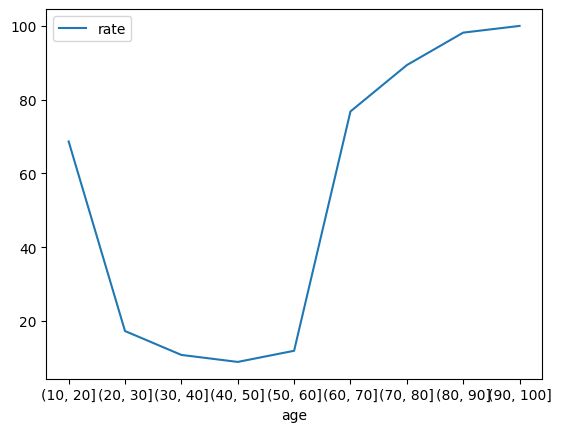

연령별 마케팅 성공 횟수


,age,y,0
0,"(10, 20]",1,57
1,"(20, 30]",1,1067
2,"(30, 40]",1,1597
3,"(40, 50]",1,837
4,"(50, 60]",1,668
5,"(60, 70]",1,212
6,"(70, 80]",1,143
7,"(80, 90]",1,54
8,"(90, 100]",1,5


연령별 마케팅 횟수


,0
0,140
1,7243
2,16385
3,10240
4,6270
5,488
6,303
7,109
8,10


In [52]:
# # # 연령대별 가입 현황
list1 =df_label[['age','y']]
age_range = pd.cut(list1['age'],bins=[10,20,30,40,50,60,70,80,90,100])

list1['age'] = age_range
a = pd.DataFrame(list1[list1['y']==0].value_counts())# 실패 
b = pd.DataFrame(list1[list1['y']==1].value_counts())# 성공

a.reset_index(inplace=True)
b.reset_index(inplace=True)
a.sort_values('age',inplace=True)
b.sort_values('age',inplace=True)
a.reset_index(inplace=True,drop=True)
b.reset_index(inplace=True,drop=True)

print('연령별 마케팅 성공 확률(%)')
df = pd.DataFrame(b[0]/a[0]*100)
df = df.set_index(a['age'])
df.columns=['rate']
df.plot()
plt.show()

print('연령별 마케팅 성공 횟수')
display(b)

print('연령별 마케팅 횟수')
display(pd.DataFrame(a[0]+b[0]))

직업별 마케팅 성공 확률(%)


,rate
job,
admin.,7.228768
blue-collar,4.492727
entrepreneur,5.319149
housemaid,8.832808
management,7.990654
retired,11.457379
self-employed,6.536585
services,5.893254
student,12.338858


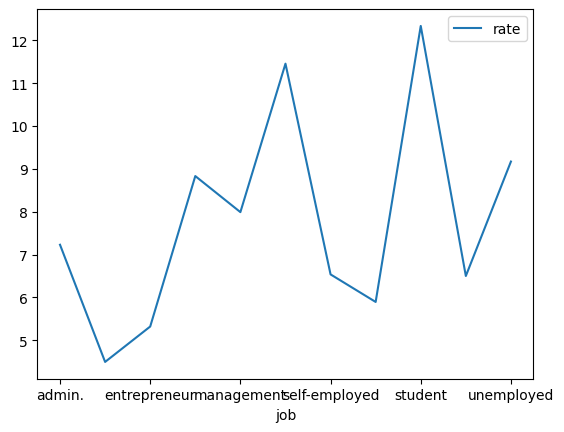

직업별 마케팅 성공 횟수


,y,0
job,,
admin.,1,589
technician,1,334
blue-collar,1,244
management,1,171
services,1,159
retired,1,125
self-employed,1,67
student,1,67
unemployed,1,62


직업별 마케팅 횟수


admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

In [53]:
# 직업별 가입현황

job_range = pd.DataFrame([df_raw['job'],df_label['y']]).transpose()
job_range = pd.DataFrame(job_range.value_counts()).reset_index()

job_range_false = job_range[job_range['y']==0].sort_values('job').set_index('job')
job_range_true = job_range[job_range['y']==1].sort_values('job').set_index('job')


print('직업별 마케팅 성공 확률(%)')
df = pd.DataFrame(job_range_true[0]/job_range_false[0]*100).fillna(0)
df.columns=['rate']
df.plot()
display(df)
plt.show()


print('직업별 마케팅 성공 횟수')
display(job_range_true.sort_values(0,ascending=False))

print('직업별 마케팅 횟수')
display(df_raw['job'].value_counts())

혼인 여부별 마케팅 성공 확률(%)


,rate
marital,
divorced,6.760817
married,6.327883
single,7.551253


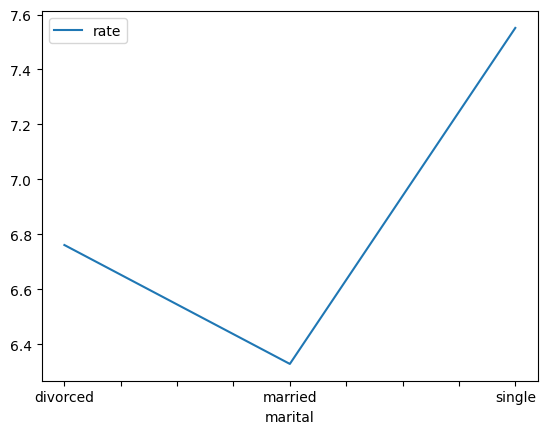

혼인 여부별 마케팅 성공 횟수


,y,0
marital,,
married,1,1041
single,1,663
divorced,1,225


혼인 여부에 따른 마케팅 횟수


married     17492
single       9443
divorced     3553
Name: marital, dtype: int64

In [54]:
# 혼인 여부에 따른 가입현황

marital_range = pd.DataFrame([df_raw['marital'],df_label['y']]).transpose()
marital_range = pd.DataFrame(marital_range.value_counts()).reset_index()

marital_range_false = marital_range[marital_range['y']==0].sort_values('marital').set_index('marital')
marital_range_true = marital_range[marital_range['y']==1].sort_values('marital').set_index('marital')


print('혼인 여부별 마케팅 성공 확률(%)')
df = pd.DataFrame(marital_range_true[0]/marital_range_false[0]*100).fillna(0)
df.columns=['rate']
df.plot()
display(df)
plt.show()


print('혼인 여부별 마케팅 성공 횟수')
display(marital_range_true.sort_values(0,ascending=False))

print('혼인 여부에 따른 마케팅 횟수')
display(df_raw['marital'].value_counts())

교육 수준별 마케팅 성공 확률(%)


,rate
education,
basic.4y,7.400722
basic.6y,4.357626
basic.9y,4.855321
high.school,6.915706
illiterate,0.000000
professional.course,6.376169
university.degree,7.784679


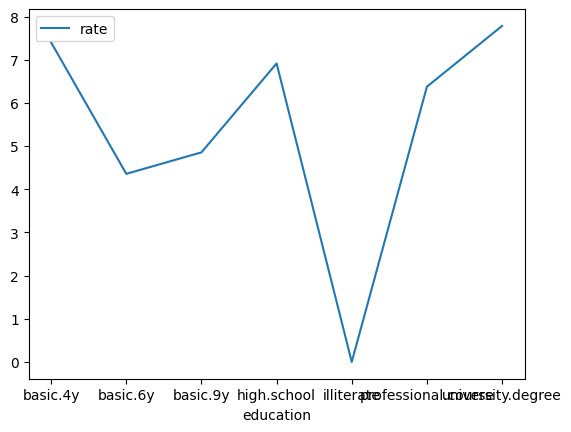

교육 수준별 마케팅 성공 횟수


,y,0
education,,
university.degree,1,752
high.school,1,498
professional.course,1,259
basic.9y,1,198
basic.4y,1,164
basic.6y,1,58


교육 수준에 따른 마케팅 횟수


university.degree      10412
high.school             7699
professional.course     4321
basic.9y                4276
basic.4y                2380
basic.6y                1389
illiterate                11
Name: education, dtype: int64

In [55]:
# 교육 수준에 따른 가입현황

education_range = pd.DataFrame([df_raw['education'],df_label['y']]).transpose()
education_range = pd.DataFrame(education_range.value_counts()).reset_index()

education_range_false = education_range[education_range['y']==0].sort_values('education').set_index('education')
education_range_true = education_range[education_range['y']==1].sort_values('education').set_index('education')


print('교육 수준별 마케팅 성공 확률(%)')
df = pd.DataFrame(education_range_true[0]/education_range_false[0]*100).fillna(0)
df.columns=['rate']
df.plot()
display(df)
plt.show()


print('교육 수준별 마케팅 성공 횟수')
display(education_range_true.sort_values(0,ascending=False))

print('교육 수준에 따른 마케팅 횟수')
display(df_raw['education'].value_counts())

파산 여부별 마케팅 성공 확률(%)


,rate
default,
no,6.755148
yes,0.000000


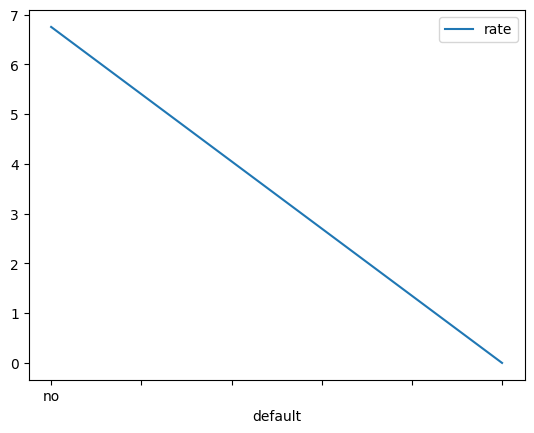

파산 여부별 마케팅 성공 횟수


,y,0
default,,
no,1,1929


파산 여부에 따른 마케팅 결과


no     30485
yes        3
Name: default, dtype: int64

In [56]:
# default 여부에 따른 가입현황

default_range = pd.DataFrame([df_raw['default'],df_label['y']]).transpose()
default_range = pd.DataFrame(default_range.value_counts()).reset_index()

default_range_false = default_range[default_range['y']==0].sort_values('default').set_index('default')
default_range_true = default_range[default_range['y']==1].sort_values('default').set_index('default')


print('파산 여부별 마케팅 성공 확률(%)')
df = pd.DataFrame(default_range_true[0]/default_range_false[0]*100).fillna(0)
df.columns=['rate']
df.plot()
display(df)
plt.show()


print('파산 여부별 마케팅 성공 횟수')
display(default_range_true.sort_values(0,ascending=False))

print('파산 여부에 따른 마케팅 결과')
display(df_raw['default'].value_counts())

주택담보 대출 보유 여부별 마케팅 성공 확률(%)


,rate
housing,
no,6.423347
yes,7.035957


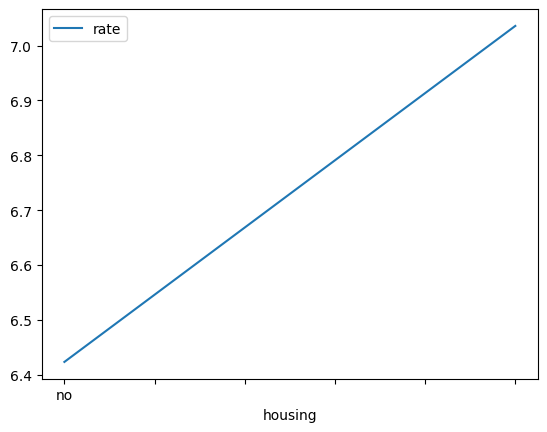

주택담보 대출 보유 여부별 마케팅 성공 횟수


,y,0
housing,,
yes,1,1086
no,1,843


주택담보 대출 보유 여부에 따른 마케팅 결과


yes    16521
no     13967
Name: housing, dtype: int64

In [57]:
# 주택담보 대출 보유 여부에 따른 가입현황

housing_range = pd.DataFrame([df_raw['housing'],df_label['y']]).transpose()
housing_range = pd.DataFrame(housing_range.value_counts()).reset_index()

housing_range_false = housing_range[housing_range['y']==0].sort_values('housing').set_index('housing')
housing_range_true = housing_range[housing_range['y']==1].sort_values('housing').set_index('housing')


print('주택담보 대출 보유 여부별 마케팅 성공 확률(%)')
df = pd.DataFrame(housing_range_true[0]/housing_range_false[0]*100).fillna(0)
df.columns=['rate']
df.plot()
display(df)
plt.show()


print('주택담보 대출 보유 여부별 마케팅 성공 횟수')
display(housing_range_true.sort_values(0,ascending=False))

print('주택담보 대출 보유 여부에 따른 마케팅 결과')
display(df_raw['housing'].value_counts())

신용 대출 보유 여부별 마케팅 성공 확률(%)


,rate
loan,
no,6.859446
yes,6.191537


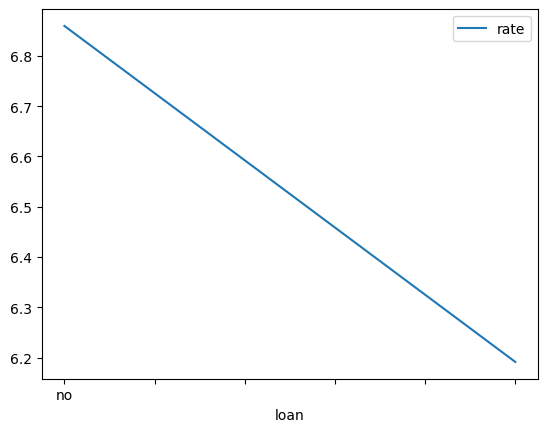

신용 대출 보유 여부별 마케팅 성공 횟수


,y,0
loan,,
no,1,1651
yes,1,278


신용 대출 보유 여부에 따른 마케팅 결과


no     25720
yes     4768
Name: loan, dtype: int64

In [58]:
# 신용 대출 보유 여부에 따른 가입현황

loan_range = pd.DataFrame([df_raw['loan'],df_label['y']]).transpose()
loan_range = pd.DataFrame(loan_range.value_counts()).reset_index()

loan_range_false = loan_range[loan_range['y']==0].sort_values('loan').set_index('loan')
loan_range_true = loan_range[loan_range['y']==1].sort_values('loan').set_index('loan')


print('신용 대출 보유 여부별 마케팅 성공 확률(%)')
df = pd.DataFrame(loan_range_true[0]/loan_range_false[0]*100).fillna(0)
df.columns=['rate']
df.plot()
display(df)
plt.show()


print('신용 대출 보유 여부별 마케팅 성공 횟수')
display(loan_range_true.sort_values(0,ascending=False))

print('신용 대출 보유 여부에 따른 마케팅 결과')
display(df_raw['loan'].value_counts())

신용 대출 보유 여부별 마케팅 성공 확률(%)


,rate
poutcome,
failure,9.768474
nonexistent,5.824527
success,20.060484


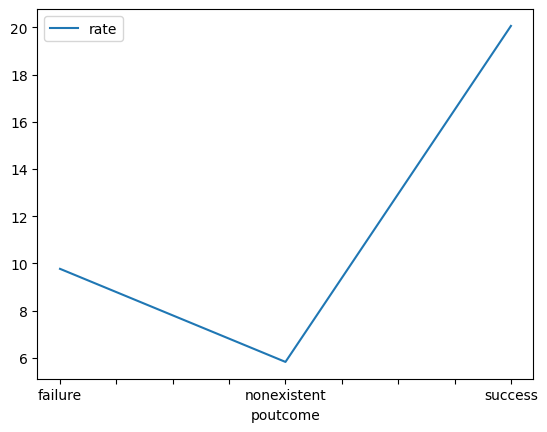

신용 대출 보유 여부별 마케팅 성공 횟수


,y,0
poutcome,,
nonexistent,1,1422
failure,1,308
success,1,199


신용 대출 보유 여부에 따른 마케팅 결과


nonexistent    25836
failure         3461
success         1191
Name: poutcome, dtype: int64

In [60]:
poutcome_range = pd.DataFrame([df_raw['poutcome'],df_label['y']]).transpose()
poutcome_range = pd.DataFrame(poutcome_range.value_counts()).reset_index()

poutcome_range_false = poutcome_range[poutcome_range['y']==0].sort_values('poutcome').set_index('poutcome')
poutcome_range_true = poutcome_range[poutcome_range['y']==1].sort_values('poutcome').set_index('poutcome')


print('신용 대출 보유 여부별 마케팅 성공 확률(%)')
df = pd.DataFrame(poutcome_range_true[0]/poutcome_range_false[0]*100).fillna(0)
df.columns=['rate']
df.plot()
display(df)
plt.show()


print('신용 대출 보유 여부별 마케팅 성공 횟수')
display(poutcome_range_true.sort_values(0,ascending=False))

print('신용 대출 보유 여부에 따른 마케팅 결과')
display(df_raw['poutcome'].value_counts())

# 인코딩 방식
## job
1) 은행 마케팅 비율이 높은 순서로 라벨 인코딩
2) 원 핫 인코딩
## education
교육 수준별 높은 값 순서로 라벨 인코딩


In [33]:
# job
job = df_raw['job']

encoder=LabelEncoder()
job = encoder.fit_transform(job)


print(encoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11]))
print('인코딩 변환값:',job.reshape(-1,1))

print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본값:',encoder.inverse_transform(np.arange(0,12)))


job_labels=job.reshape(-1,1)

oh_encoder=OneHotEncoder()
oh_encoder.fit(job_labels)
job_encode = oh_encoder.transform(job_labels).toarray()

job_encode

df_job_encode = pd.DataFrame(data=job_encode,columns=encoder.inverse_transform(np.arange(12)))
# job = 라벨인코딩
# 0: 'admin.' 
# 1: 'blue-collar' 
# 2: 'entrepreneur' 
# 3: 'housemaid' 
# 4: 'management' 
# 5: 'retired'
# 6: 'self-employed' 
# 7: 'services' 
# 8: 'student' 
# 9: 'technician' 
# 10: 'unemployed' 
# 11: 'unknown'
# job_encode = 원핫인코딩
df_job_encode

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
인코딩 변환값: [[3]
 [7]
 [7]
 ...
 [5]
 [9]
 [5]]
인코딩 클래스: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
디코딩 원본값: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
# marital
df_mar=df_raw['marital']
df_mar

mar_category=['married','single','divorced','unknown'] 
encoder=LabelEncoder()
encoder.fit(df_mar)
marital = encoder.transform(df_mar)






marital=marital.reshape(-1,1)

oh_encoder=OneHotEncoder()
oh_encoder.fit(marital)
marital_encode = oh_encoder.transform(marital).toarray()
marital_encode

df_marital_encode = pd.DataFrame(data=marital_encode,columns=encoder.inverse_transform(np.arange(4)))

df_marital_encode.columns=['divorced','married','single','marital_unknown']
df_marital_encode
#marital: 라벨 인코딩
# divorced: 0, married: 1, single: 2, unknown:3
# marital_encode: 원핫 인코딩

,divorced,married,single,marital_unknown
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
41183,0.0,1.0,0.0,0.0
41184,0.0,1.0,0.0,0.0
41185,0.0,1.0,0.0,0.0
41186,0.0,1.0,0.0,0.0


In [35]:
# education
df_edu = df_raw['education']


edu_category= ['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course','unknown']   

for i in edu_category:
    df_edu = df_edu.apply(lambda x: x.replace(i,str(edu_category.index(i))))

edu=df_edu.astype('int64')

edu_label = np.array(edu).reshape(-1,1)

oh_encoder=OneHotEncoder()
oh_encoder.fit(edu_label)
edu_encode = oh_encoder.transform(edu_label).toarray()

edu_encode


df_edu_encode = pd.DataFrame(data=edu_encode,columns=edu_category)


df_edu_encode = df_edu_encode.rename(columns={'unknown':'edu_unknown'})
df_edu_encode
# edu: 라벨 인코딩
# 0: 'illiterate',
# 1: 'basic.4y',
# 2: 'basic.6y',
# 3: 'basic.9y',
# 4: 'high.school',
# 5: 'university.degree',
# 6: 'professional.course',
# 7: 'unknown'
# edu_encode: 원핫 인코딩

,illiterate,basic.4y,basic.6y,basic.9y,high.school,university.degree,professional.course,edu_unknown
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41186,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# default

default = df_raw['default']

def_category=['no','yes','unknown']


for i in def_category:
    default = default.apply(lambda x: x.replace(i,str(def_category.index(i))))

default = default.apply(lambda x: x.replace('unk0wn','2'))
               
default= default.astype('int64')


default = np.array(default).reshape(-1,1)

oh_encoder=OneHotEncoder()
oh_encoder.fit(default)
default_encode = oh_encoder.transform(default).toarray()

default_encode


df_default_encode = pd.DataFrame(data=default_encode,columns=['no','yes','unknown'])


df_default_encode.columns = ['default_no', 'default_yes','default_unknown']
df_default_encode
# default: 라벨 인코딩
# 0: 'no',
# 1: 'yes',
# 2: 'unknown',

# default_encode: 원핫 인코딩

,default_no,default_yes,default_unknown
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
41183,1.0,0.0,0.0
41184,1.0,0.0,0.0
41185,1.0,0.0,0.0
41186,1.0,0.0,0.0


In [37]:
#housing loan pdays
# house
house = df_raw['housing']


house = house.apply(lambda x: x.replace('no','0'))
house = house.apply(lambda x: x.replace('yes','1'))
house = house.apply(lambda x: x.replace('unknown','2'))
house = house.apply(lambda x: x.replace('unk0wn','2'))

house.astype('int64')

encoder = OneHotEncoder(sparse=True)
house_encode = encoder.fit_transform(np.array(house).reshape(-1,1)).toarray()

house_encode


df_house_encode = pd.DataFrame(data=house_encode,columns=['no','yes','unknown'])



df_house_encode.columns = ['house_no', 'house_yes','house_unknown']
df_house_encode

df_house_encode
# house = 라벨인코딩(no: 0, yes: 1, unknown:2)
# house_encode = 원핫인코딩()

,house_no,house_yes,house_unknown
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
41183,0.0,1.0,0.0
41184,1.0,0.0,0.0
41185,0.0,1.0,0.0
41186,1.0,0.0,0.0


In [38]:
# loan
loan = df_raw['loan']


loan = loan.apply(lambda x: x.replace('no','0'))
loan = loan.apply(lambda x: x.replace('yes','1'))
loan = loan.apply(lambda x: x.replace('unknown','2'))
loan = loan.apply(lambda x: x.replace('unk0wn','2'))

loan.astype('int64')

encoder = OneHotEncoder()
loan_encode = encoder.fit_transform(np.array(loan).reshape(-1,1))
loan_encode = loan_encode.toarray()
loan_encode



df_loan_encode = pd.DataFrame(data=loan_encode,columns=['no','yes','unknown'])

df_loan_encode.columns = ['loan_no', 'loan_yes','loan_unknown']
df_loan_encode

df_loan_encode

# loan = 라벨인코딩(no: 0, yes: 1, unknown:2)
# loan_encode = 원핫인코딩()

,loan_no,loan_yes,loan_unknown
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
41183,1.0,0.0,0.0
41184,1.0,0.0,0.0
41185,1.0,0.0,0.0
41186,1.0,0.0,0.0


In [39]:
#pdays= 999를 -1로 전환
pdays = df['pdays'].astype('str')


pdays = pdays.apply(lambda x: x.replace('999','-1'))

pdays = pdays.astype('int64')

pdays = pd.DataFrame(data=pdays)
pdays

,pdays
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
41183,-1
41184,-1
41185,-1
41186,-1


In [40]:
# pout
pout=df_raw['poutcome']
pout


pout= pout.apply(lambda x: x.replace('failure','0'))
pout = pout.apply(lambda x: x.replace('success','1'))
pout = pout.apply(lambda x: x.replace('nonexistent','2'))



labels_p=np.array(pout).reshape(-1,1)
oh_encorder=OneHotEncoder()
oh_encorder.fit(labels_p)
oh_labels_p=oh_encorder.transform(labels_p)
oh_labels_p = oh_labels_p.toarray()




df_oh_labels_p = pd.DataFrame(data=oh_labels_p,columns=['pout_no','pout_yes','pout_unknown'])


df_oh_labels_p
# pout = 라벨인코딩(이전 결과 실패:0,성공:1,알수없음:2)
# oh_labels_p = 원핫 인코딩


,pout_no,pout_yes,pout_unknown
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
41183,0.0,0.0,1.0
41184,0.0,0.0,1.0
41185,0.0,0.0,1.0
41186,0.0,0.0,1.0


In [41]:
# y
y = df_raw['y']

encorder=LabelEncoder()
encorder.fit(y)
labels_y=encorder.transform(y)

print(labels_y)
print(df['y'])

y_encode = pd.DataFrame(data=labels_y,columns=['y'])

[0 0 0 ... 0 1 0]
0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object


In [42]:
df = df_raw.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed'],axis=1)
df

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,999,0,nonexistent,yes


In [43]:
df_label = df

df_label['job'] = job
df_label['marital'] = marital
df_label['education'] = edu
df_label['default'] = default
df_label['housing'] = house
df_label['loan'] = loan
df_label['poutcome'] = pout
df_label['y'] = labels_y

df_label

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,y
0,56,3,1,1,0,0,0,999,0,2,0
1,57,7,1,4,2,0,0,999,0,2,0
2,37,7,1,4,0,1,0,999,0,2,0
3,40,0,1,2,0,0,0,999,0,2,0
4,56,7,1,4,0,0,1,999,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,6,0,1,0,999,0,2,1
41184,46,1,1,6,0,0,0,999,0,2,0
41185,56,5,1,5,0,1,0,999,0,2,0
41186,44,9,1,6,0,0,0,999,0,2,1


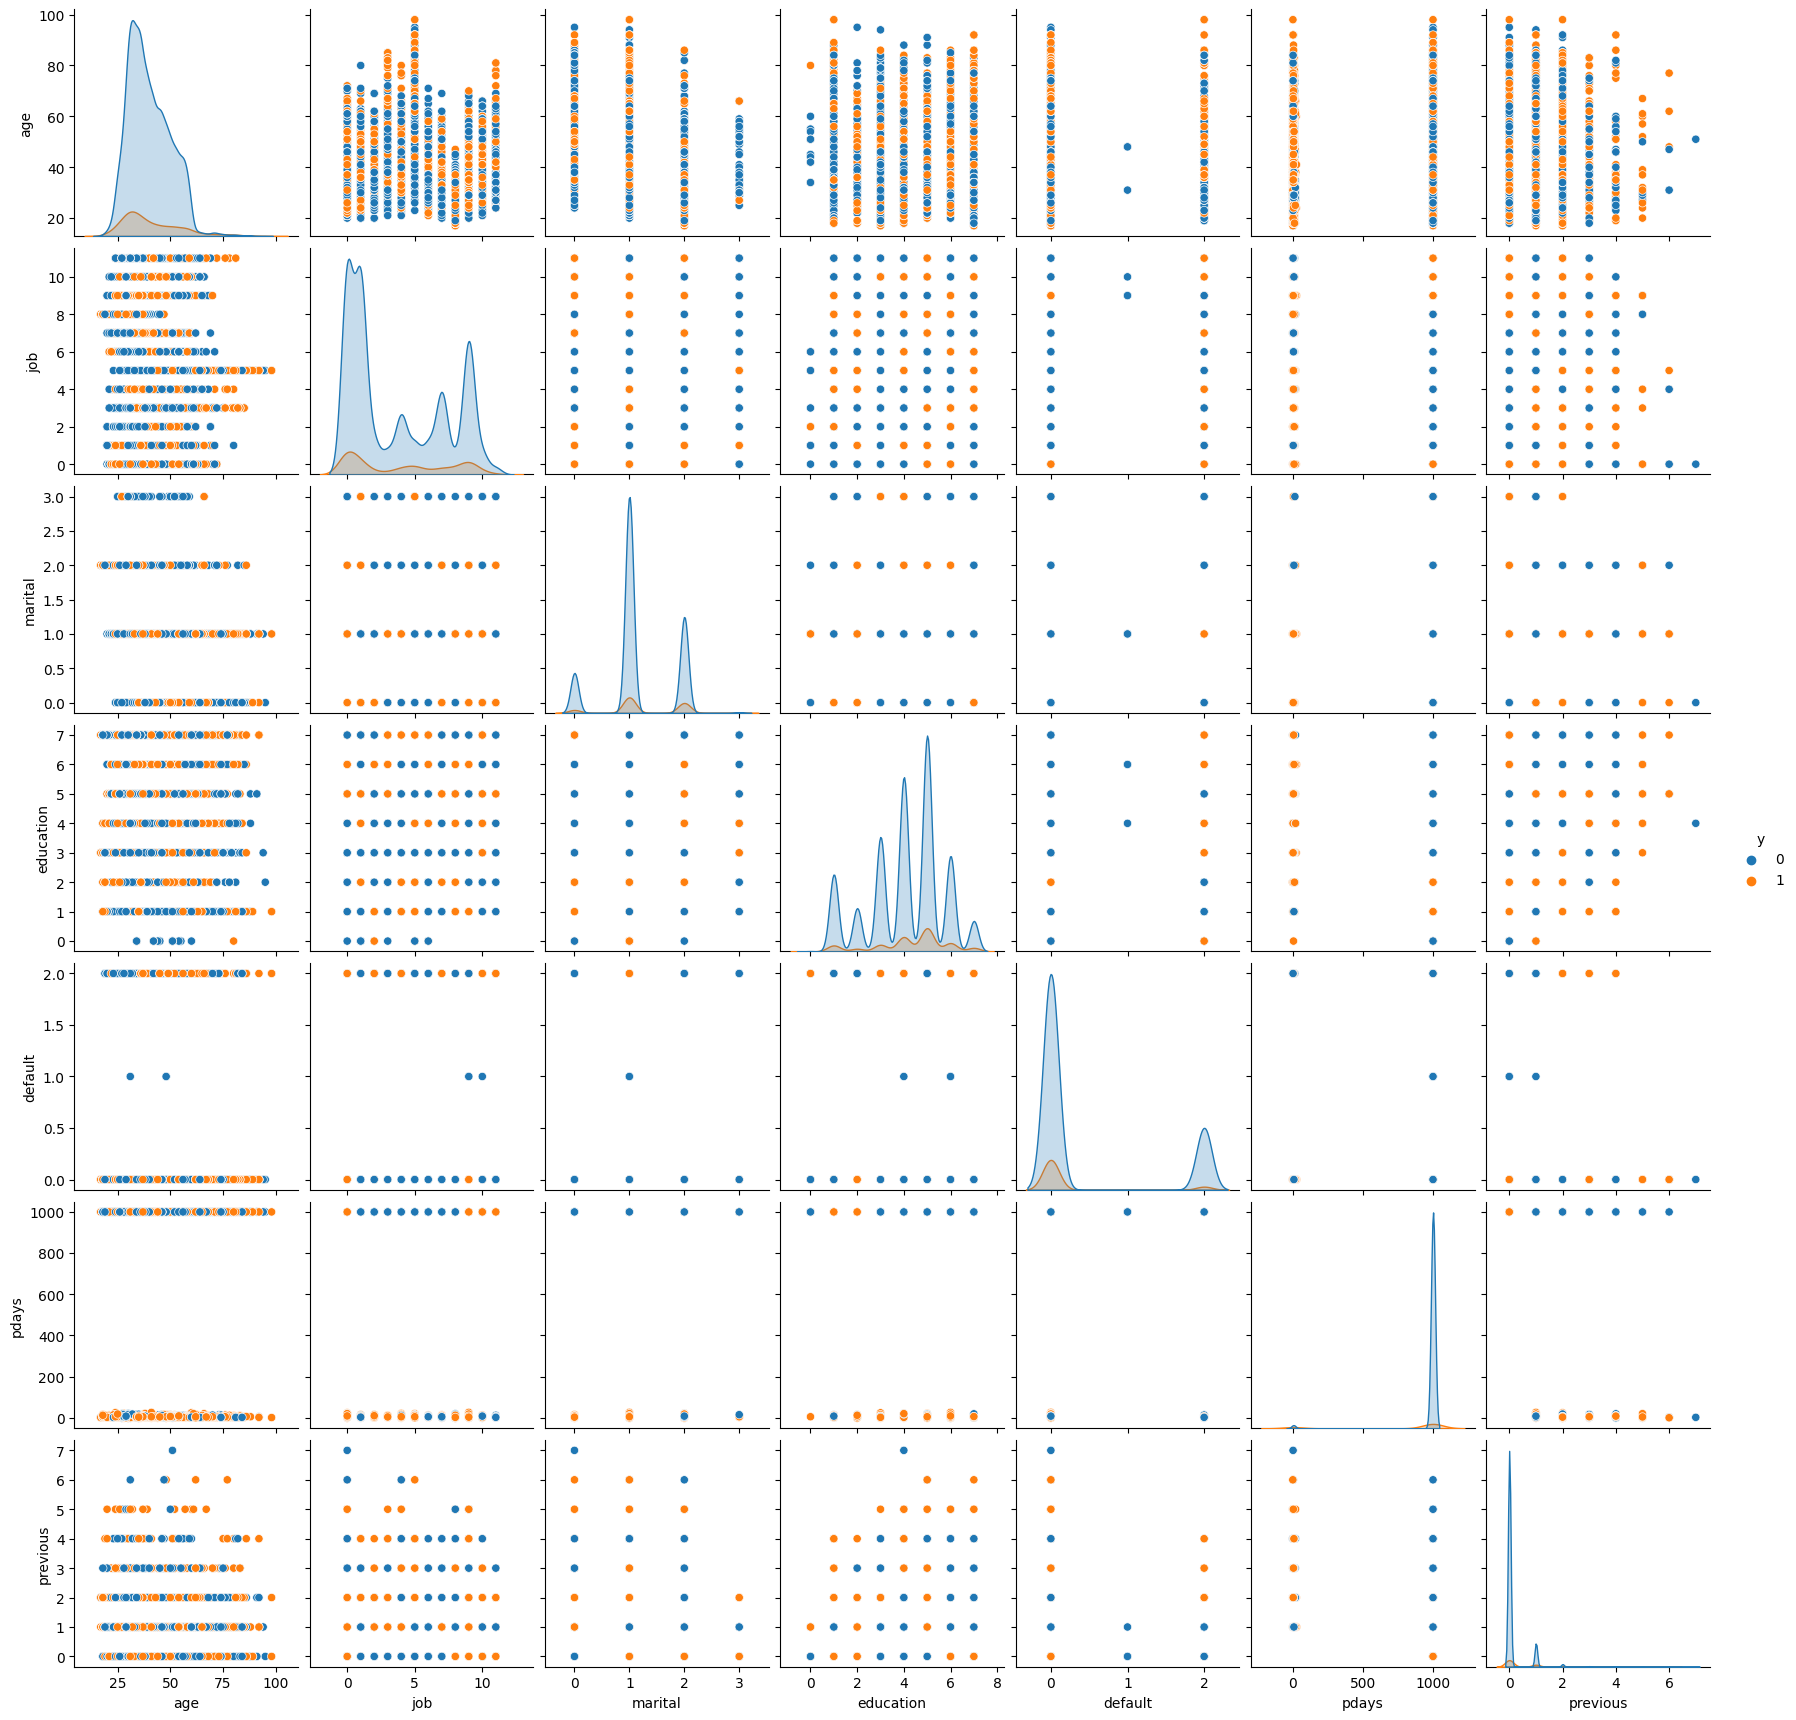

In [44]:
sns.pairplot(df_label,hue='y')


# 원핫 인코딩 데이터프레임

In [45]:
df_onehot = pd.DataFrame(df_raw['age'])
df_onehot = pd.concat([df_onehot,df_job_encode,df_marital_encode,df_edu_encode,df_default_encode, df_house_encode,df_loan_encode,pdays,df['previous'],df_oh_labels_p,y_encode],axis=1)
a = pd.DataFrame(df_raw['age'])
df_onehot_mo = pd.concat([a,df_job_encode,df_marital_encode,df_edu_encode,df_default_encode, df_house_encode,df_loan_encode,pdays,df['previous'],df_oh_labels_p,df_raw.loc[:,'emp.var.rate':'nr.employed'],y_encode],axis=1)
df_onehot_mo.columns


Index(['age', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single',
       'marital_unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'university.degree', 'professional.course',
       'edu_unknown', 'default_no', 'default_yes', 'default_unknown',
       'house_no', 'house_yes', 'house_unknown', 'loan_no', 'loan_yes',
       'loan_unknown', 'pdays', 'previous', 'pout_no', 'pout_yes',
       'pout_unknown', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [46]:
df_label.to_csv('label_encoding_data.csv')
df_onehot.to_csv('onehot_encoding_data.csv')
df_onehot_mo.to_csv('onehot_modifi.csv')

In [47]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [48]:
import numpy as np
import pandas as pd

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE


In [49]:
df_dropna = df_raw

for i in df_label.columns:
    index1 = df_dropna[df_dropna[i]=='unknown'].index
    index2 = df_dropna[df_dropna[i]=='unkn0wn'].index
    
    df_dropna.drop(index1,inplace=True)
    df_dropna.drop(index2,inplace=True)
df_dropna

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [50]:
df_dropna.reset_index(drop=True,inplace=True)
df_dropna.to_csv('dropna_data.csv')

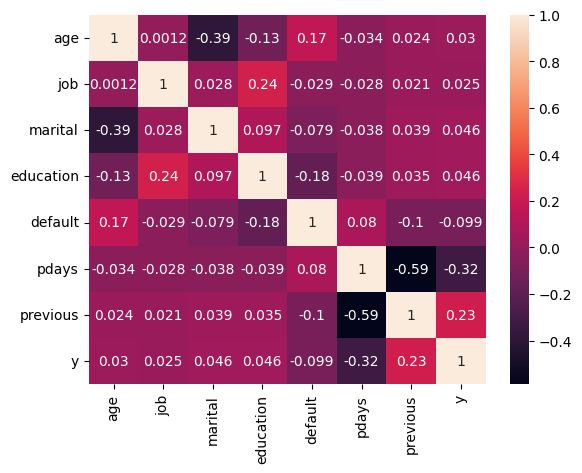

In [51]:
heat = sns.heatmap(df_label.corr(),annot=True)